In [1]:
import allel
import ingenos
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

##### set base directory

In [2]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo"

##### read in the average concordance for SNPs in each inversion/inversion version so I can get not only the positions but the minimum concordance

In [3]:
a = pd.read_csv(base + "/data/results/2La/comp/a_kfold_10reps_average_concordance.092218.tsv",
               sep = "\t")

j = pd.read_csv(base + "/data/results/2Rj/comp/j_kfold_10reps_average_concordance.092018.tsv",
               sep = "\t")

b = pd.read_csv(base + "/data/results/2Rb/comp/b_kfold_10reps_average_concordance.091918.tsv",
               sep = "\t")

c_col = pd.read_csv(
    base + "/data/results/2Rc/comp/col_c_kfold_10reps_average_concordance.031419.tsv",
               sep = "\t")

c_gam = pd.read_csv(
    base + "/data/results/2Rc/comp/gam_c_kfold_10reps_average_concordance_run_2.031819.tsv",
               sep = "\t")

u = pd.read_csv(base + "/data/results/2Ru/comp/u_kfold_10reps_average_concordance.092018.tsv",
               sep = "\t")

d = pd.read_csv(base + "/data/results/2Rd/comp/d_kfold_10reps_average_concordance.052519.tsv",
               sep = "\t")

In [4]:
a_top = a.loc[((a["called_0"] > 0.9) & (a["called_1"] > 0.9) & (a["called_2"] > 0.9) &\
               (a["min"] > 0.995) & (a["count"] >= 8)), ["position","min"]]

j_top = j.loc[((j["called_0"] > 0.9) & (j["called_1"] > 0.9) & (j["called_2"] > 0.9) &\
               (j["min"] > 0.8) & (j["count"] >= 8)), ["position","min"]]

b_top = b.loc[((b["called_0"] > 0.9) & (b["called_1"] > 0.9) & (b["called_2"] > 0.9) &\
               (b["min"] > 0.8) & (b["count"] >= 8)), ["position","min"]]

c_col_top = c_col.loc[((c_col["called_0"] > 0.9) & (c_col["called_1"] > 0.9) &\
                         (c_col["called_2"] > 0.9) &\
               (c_col["min"] > 0.8) & (c_col["count"] >= 8)), ["position","min"]]

c_gam_top = c_gam.loc[((c_gam["called_0"] > 0.9) & (c_gam["called_1"] > 0.9) &\
                         (c_gam["called_2"] > 0.9) &\
               (c_gam["min"] > 0.8) & (c_gam["count"] >= 8)), ["position","min"]]

u_top = u.loc[((u["called_0"] > 0.9) & (u["called_1"] > 0.9) & (u["called_2"] > 0.9) &\
               (u["min"] > 0.8) & (u["count"] >= 8)), ["position","min"]]

d_top = d.loc[((d["called_0"] > 0.9) & (d["called_1"] > 0.9) & (d["called_2"] > 0.9) &\
               (d["min"] > 0.8) & (d["count"] >= 8)), ["position","min"]]

In [5]:
a_top["label"] = "a"
a_top["inversion"] = "a"

j_top["label"] = "j"
j_top["inversion"] = "j"

b_top["label"] = "b"
b_top["inversion"] = "b"

c_col_top["label"] = "c_col"
c_col_top["inversion"] = "c"

c_gam_top["label"] = "c_gam"
c_gam_top["inversion"] = "c"

d_top["label"] = "d"
d_top["inversion"] = "d"

u_top["label"] = "u"
u_top["inversion"] = "d"

In [6]:
chrom_2R = pd.concat([j_top, b_top, c_col_top, c_gam_top, d_top, u_top])

In [7]:
len(a_top)

209

In [8]:
len(chrom_2R)

878

In [9]:
chrom_2R["label"].value_counts()

b        349
u        177
d        147
j         99
c_col     57
c_gam     49
Name: label, dtype: int64

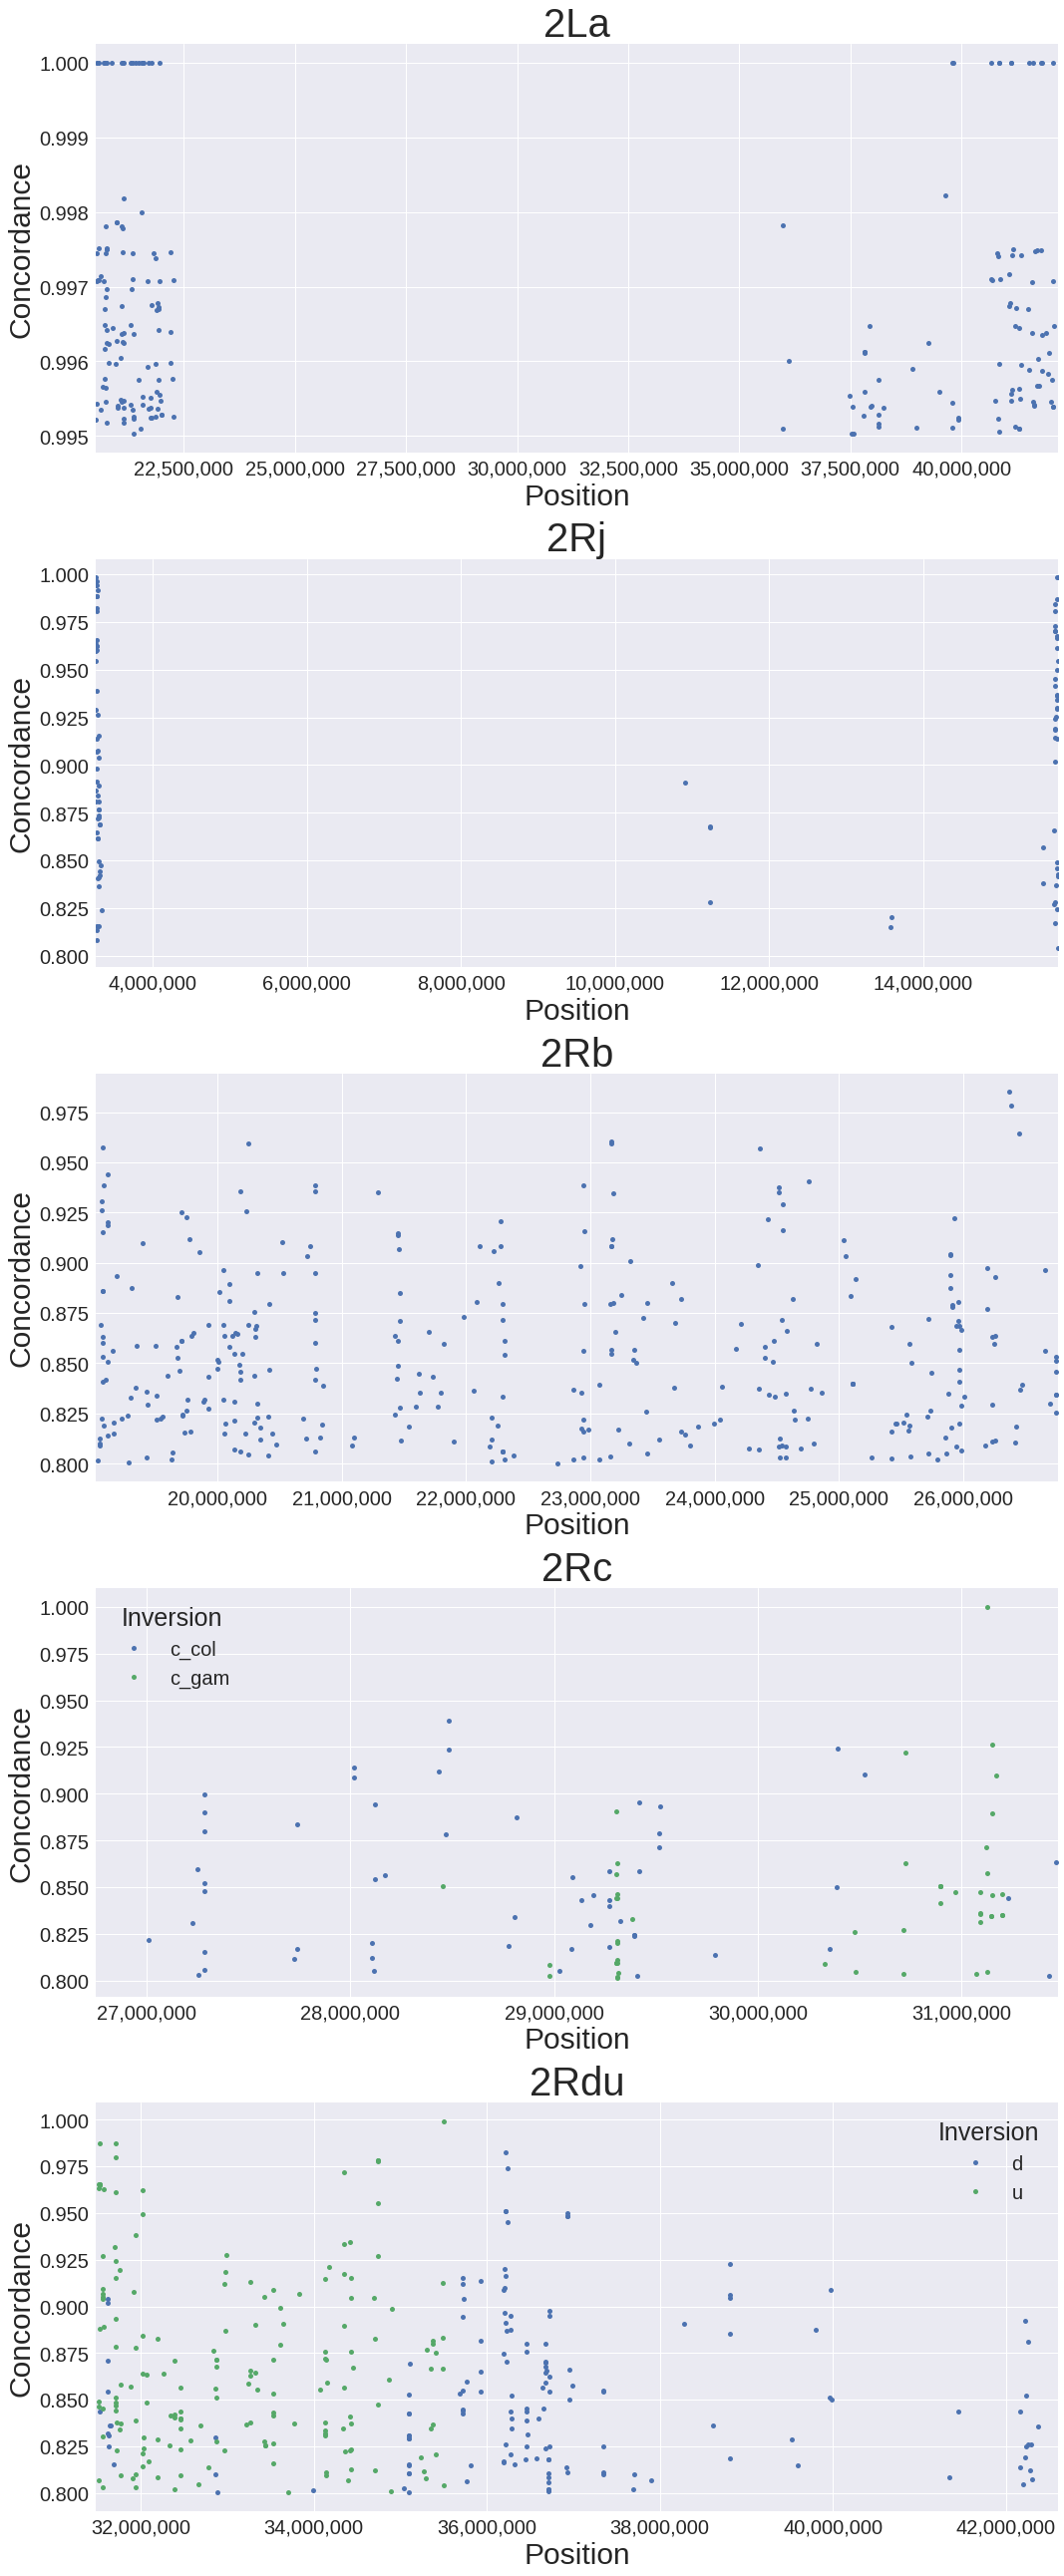

In [10]:
outString = ingenos.make_date_stamp(
    base + "/data/results/comp_aim1/location_of_target_SNPs_d_u_combined")

fig, axes = plt.subplots(nrows=5, ncols=1, figsize = (15, 36))

for i, ax in enumerate(axes):

    if i == 0:
        
        inversion = "a"
        
        inv_min = ingenos.inversionDict["2L" + inversion].proximal_start
        inv_max = ingenos.inversionDict["2L" + inversion].distal_end
        
        ax.plot(a_top["position"], a_top["min"], label = "a", linestyle = ' ',
           marker = ".", markersize=10)
        
        ax.set_xlim(inv_min, inv_max)
        ax.ticklabel_format(useOffset=False, style="plain")
        ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        ax.set_xlabel("Position", fontsize=30)
        ax.set_ylabel("Concordance", fontsize=30)
    
        ax.set_title(("2La"), fontsize=40)   
        
    else:
        
        inversion = chrom_2R["inversion"].unique()[i-1]
    
        inversion_chunk = chrom_2R.loc[chrom_2R["inversion"] == inversion,:]
        
        ax.set_title(("2R" + inversion), fontsize=40)
        
        if inversion == "d":
            
            ax.set_title(("2Rdu"), fontsize=40)
            inv_min = 31495381
            inv_max = 42375004

        inv_min = ingenos.inversionDict["2R" + inversion].proximal_start
        inv_max = ingenos.inversionDict["2R" + inversion].distal_end

        for label in inversion_chunk["label"].unique():

            chunk = inversion_chunk.loc[inversion_chunk["label"] == label,:]

            ax.plot(chunk["position"], chunk["min"], label = label, linestyle = ' ',
               marker = ".", markersize=10)

        ax.set_xlim(inv_min, inv_max)
        ax.ticklabel_format(useOffset=False, style="plain")
        ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        ax.set_xlabel("Position", fontsize=30)
        ax.set_ylabel("Concordance", fontsize=30)
        
        if inversion == "c" or inversion == "d":

            legend = ax.legend(title="Inversion", fontsize=20)
            legend.get_title().set_fontsize('25')
            
plt.tight_layout()
plt.savefig(outString);